In [1]:
#ライブラリをインポート
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [2]:
#解析データをdfとして取り込み
df = pd.read_excel("入力データ.xlsx", sheet_name="特徴量", index_col=0).transpose()
nug = pd.read_excel("入力データ.xlsx", sheet_name="クラス", index_col=0).transpose()


#データの先頭5行を確認（データにミスが無いか確認）
df.head()

,0ms-2ms_最大値（生値）,0ms-2ms_最小値（生値）,0ms-2ms_平均値,0ms-2ms_変化量,0ms-2ms_積分（生値）,0ms-2ms_標準偏差,0ms-2ms_最大値（オフセット）,0ms-2ms_最小値（オフセット）,0ms-2ms_積分（オフセット）,0ms-4ms_最大値（生値）,...,0ms-4ms_積分（オフセット）,2ms-4ms_最大値（生値）,2ms-4ms_最小値（生値）,2ms-4ms_平均値,2ms-4ms_変化量,2ms-4ms_積分（生値）,2ms-4ms_標準偏差,2ms-4ms_最大値（オフセット）,2ms-4ms_最小値（オフセット）,2ms-4ms_積分（オフセット）
1,0.990607,0.841471,0.916039,0.149136,1.832078,0.105455,0.0,-0.149136,0.149136,0.990607,...,0.230446,0.909297,0.841471,0.875384,0.067826,1.750768,0.047961,0.067826,0.000000,0.067826
2,1.668915,1.327137,1.498026,0.341778,2.996052,0.241674,0.0,-0.341778,0.341778,1.668915,...,0.899316,1.327137,1.111378,1.219257,0.215759,2.438515,0.152565,0.000000,-0.215759,0.215759
3,1.776132,1.734427,1.755280,0.041705,3.510559,0.029490,0.0,-0.041705,0.041705,1.776132,...,0.587493,1.734427,1.230344,1.482386,0.504083,2.964771,0.356440,0.000000,-0.504083,0.504083
4,1.749081,0.993954,1.371518,0.755127,2.743036,0.533955,0.0,-0.755127,0.755127,1.749081,...,1.059361,1.444847,0.993954,1.219401,0.450893,2.438802,0.318829,0.450893,0.000000,0.450893
5,1.848263,1.440724,1.644494,0.407539,3.288987,0.288174,0.0,-0.407539,0.407539,1.848263,...,0.553329,1.702474,1.440724,1.571599,0.261750,3.143198,0.185085,0.261750,0.000000,0.261750


In [3]:
train_x = df
train_y = nug

In [4]:
(train_x, test_x ,train_y, test_y) = train_test_split(train_x, train_y, test_size = 0.3, random_state = 42)

In [5]:
#木の最大の深さ30、木の数30個、
random_forest = RandomForestClassifier(max_depth=30, n_estimators=30, random_state=42)
random_forest.fit(train_x, train_y)

<ipython-input-5-6b2f5f781287>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(train_x, train_y)


RandomForestClassifier(max_depth=30, n_estimators=30, random_state=42)

In [6]:
# 予測値算出
y_pred = random_forest.predict(test_x)

In [7]:
#モデルを作成する段階でのモデルの識別精度
trainaccuracy_random_forest = random_forest.score(train_x, train_y)
print('TrainAccuracy: {}'.format(trainaccuracy_random_forest))

#作成したモデルに学習に使用していない評価用のデータセットを入力し精度を確認
accuracy_random_forest = accuracy_score(test_y, y_pred)
print('Accuracy: {}'.format(accuracy_random_forest))

TrainAccuracy: 1.0
Accuracy: 0.4666666666666667


In [8]:
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.12      0.20         8
           1       0.46      0.86      0.60         7

    accuracy                           0.47        15
   macro avg       0.48      0.49      0.40        15
weighted avg       0.48      0.47      0.39        15



In [9]:
# 変数の重要度を可視化
importance = pd.DataFrame({ '変数' :train_x.columns, '重要度' :random_forest.feature_importances_})
importance

,変数,重要度
0,0ms-2ms_最大値（生値）,0.029500
1,0ms-2ms_最小値（生値）,0.025817
2,0ms-2ms_平均値,0.016904
3,0ms-2ms_変化量,0.022382
4,0ms-2ms_積分（生値）,0.033319
5,0ms-2ms_標準偏差,0.035094
6,0ms-2ms_最大値（オフセット）,0.000000
7,0ms-2ms_最小値（オフセット）,0.019625
8,0ms-2ms_積分（オフセット）,0.025515
9,0ms-4ms_最大値（生値）,0.044119


In [16]:
df_2 = pd.concat([df,nug], axis=1)

In [32]:
df_N0 = df_2[df_2['クラス'] == 0]
df_N1 = df_2[df_2['クラス'] == 1]

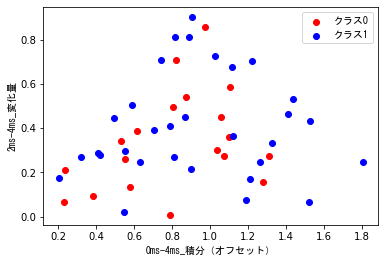

In [39]:
plt.scatter(df_N0['0ms-4ms_積分（オフセット）'], df_N0['2ms-4ms_変化量'], c = 'red', label='クラス0')
plt.scatter(df_N1['0ms-4ms_積分（オフセット）'], df_N1['2ms-4ms_変化量'], c = 'blue', label='クラス1')
plt.ylabel('2ms-4ms_変化量', fontname="MS Gothic")
plt.xlabel('0ms-4ms_積分（オフセット）', fontname="MS Gothic")

plt.legend(prop={"family":"MS Gothic"})
plt.show()

In [119]:
from dtreeviz.trees import dtreeviz


viz = dtreeviz(
    random_forest[0],
    train_x.values,
    train_y.values,
    feature_names=list(train_x.columns),
    target_name = 'クラス',
    class_names=list(["0", "1"]),
)
 
dfiplay(viz)

C:\Users\yuuuu\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 12463 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\yuuuu\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 12521 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\yuuuu\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 12473 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\yuuuu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yuuuu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yuuuu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12473 missing from current fo

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [125]:
from sklearn.datasets import load_iris
from sklearn import tree
from dtreeviz.trees import dtreeviz
 
clf = tree.DecisionTreeClassifier(max_depth=2)  # limit depth of tree
iris = load_iris()
clf.fit(iris.data, iris.target)
 
viz = dtreeviz(
    clf,
    iris.data,
    iris.target,
    target_name='variety',
    feature_names=iris.feature_names,
    class_names=[str(i) for i in iris.target_names],
)
 
viz.save("test.svg")

In [122]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [110]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')